# Active Subspaces for Dimension Reduction

## 1. Motivation

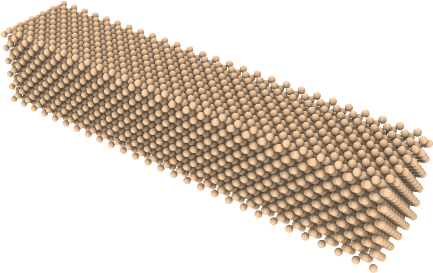

In [1]:
from IPython.display import display, Image
Image(filename='Images/Sibar_05.png')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
rc('text', usetex=True)

sns.set(style="darkgrid")

data = [['1', '10', '10 H'], ['2', '100', '4.2 D'],
       ['3','1000','1.4 M'],['4','10000','1.2 Y'],
       ['5','100000','11.6 Y']]
df = pd.DataFrame(data, columns=["Parameters", "Model Runs", "Time (1H/Run)"])
df.style.hide_index()

Parameters,Model Runs,Time (1H/Run)
1,10,10 H
2,100,4.2 D
3,1000,1.4 M
4,10000,1.2 Y
5,100000,11.6 Y


 ## 2. Objective 
 Discover a low-dimensional structure in the model.

## 3. Procedure

### Step 1:
Construct a matrix, $\newcommand{\mat}[1]{\mathbf{{#1}}} \mat{C}$:

$$\newcommand{\Np}{{N_\text{p}}}$$
$$ 
\begin{equation}
\mat{C} = \int_\Omega (\nabla_{\mat{\xi}}f)(\nabla_{\mat{\xi}}f)^\top \mu(d\mat\xi),
\end{equation}
$$

where, $f$ is the model output, $\mathbf{\xi}$ is a vector of canonical random variables; $\mu(d\mat{\xi}) = \pi(\mat{\xi})d\mat{\xi}$, $\pi(\mat{\xi})$ is a joint PDF of $\mat{\xi}$. Note that:

 - $f$ is assumed to square integrable with continuous partial derivatives with respect to the input parameters. 
 - $\mat{C}$ is a symmetric and positive semi-definite matrix. Hence, it admits an eigenvalue decomposition.

### Step 2:
Eigenvalue Decomposition:

$$
\begin{equation}
\mat{C} = \mat{W}\mat{\Lambda}\mat{W}^\top.
\end{equation}
$$

Here $\mat{\Lambda}$ = diag($\lambda_1,\ldots,\lambda_{N_p}$) with the eigenvalues
$\lambda_i$'s sorted in descending order:

$$
     \lambda_1 \geq \lambda_2 \geq \cdots \geq \lambda_\Np \geq 0,
$$ 
and $\mat{W}$ has the (orthonormal) eigenvectors $\mathbf{w}_1, \ldots, \mathbf{w}_\Np$ as its columns.

### Step 3:

Partition the Eigenpairs:

The eigenpairs are partitioned about the $r$th eigenvalue such that
$\lambda_r/\lambda_{r+1}\gg 1$, 

$$
\begin{equation}
 \mat{W} = [\mat{W}_1~\mat{W}_2],~~\mat{\Lambda} = \begin{bmatrix}\mat{\Lambda}_1 & \\  &
  \mat{\Lambda}_2. 
\end{bmatrix}
\end{equation}
$$

The columns of $\mat{W}_1 = 
\begin{bmatrix} \mathbf{w}_r \cdots \mathbf{w}_r\end{bmatrix}$ 
span the dominant eigenspace of $\mat{C}$ and
define the active subspace, and $\mat{\Lambda}_1$ is a diagonal matrix with
the corresponding set of eigenvalues, $\lambda_1, \ldots, \lambda_r$, on its diagonal. 

### Step 4:

Dimension Reduction:

Dimension reduction is accomplished by transforming the parameter
vector $\mathbf\xi$ into 
$\mathbf{y} = \mat{W}_1^\top\mathbf{\xi} \in \mathbb{R}^r$. The elements of $\mathbf{y}$ are 
referred to as the set of active variables. 

Consider the function:
$$
    G(\mathbf{y}) = f(\mat{W}_1\mathbf{y}), \quad \mathbf{y} \in \mathbb{R}^r.
$$

We use the approximation: 
$$
f(\mathbf{\xi}) \approx f(\mat{W}_1 \mat{W}_1^T \mathbf\xi) =  
G(\mat{W}_1^\top \mathbf{\xi}).
$$

Hence, the model output $f(\mathbf\xi)$, in the original parameter space,
is approximated by $G(\mat{W}_1^\top \mathbf{\xi})$ in the active subspace.


### Step 5:

Reduced Space Surrogate:

To further expedite uncertainty analysis, we could fit a regression surface to $G$ as follows:

1. Consider a given set of $N$ data points, $\big(\mathbf{\xi}_i, f(\mathbf{\xi}_i)\big)$, $i = 1, \ldots, N$.
2. For each $\mathbf{\xi}_i$, compute $\mathbf{y}_i = \mat{W}_1^\top\mathbf{\xi}_i$. Note that $G(\mathbf{y}_i)$ $\approx$ $f(\mathbf{\xi}_i)$.
3. Use data points $\big(\mathbf{y}_i, f(\mathbf\xi_i)\big)$, $i = 1, \ldots, N$, to compute a regression surface $\tilde{G}(\mathbf{y})\approx 
G(\mathbf{y})$.
4. Overall approximation, $f(\mathbf{\xi})$ $\approx$ $\tilde{G}(\mat{W}_1^\top\mathbf{\xi})$.

## 4. Implementation

In practice, the matrix $\mat{C}$ is 
approximated using pseudo-random sampling techniques such as Monte Carlo or
Latin hypercube sampling:

$$
 \begin{equation}
 \mat{C}\approx \hat{\mat{C}} = \frac{1}{N}\sum\limits_{i=1}^{N} 
 (\nabla_{\mathbf{\xi}}f(\mathbf{\xi}_i))(\nabla_{\mathbf{\xi}}f(\mathbf{\xi}_i))^\top
 = \hat{\mat{W}}\hat{\mat{\Lambda}}\hat{\mat{W}}^\top
 \end{equation}
 $$
 
Clearly, the computational effort associated with constructing the matrix
$\hat{\mat{C}}$ scales with the number of samples, $N$. 

### Iterative Procedure

1. Set $k$ = 0
2. Draw $n_k$ random samples, $\{\mathbf{\xi}_i\}_{i=1}^{n_k}$ according to $\pi_{\mathbf{\xi}}$ 
3. Set $N_\text{total}$ = $n_k$
4. For each $i=1, \ldots, N_\text{total}$, compute $f(\mathbf{\xi}_i)$ and the gradient $\mathbf{g}^i = \nabla_{\mathbf{\xi}}f(\mathbf{\xi}_i)$
5. Compute $\hat{\mat{C}}$ and its eigenvalue decomposition 
$$
\hat{\mat{C}} = \frac{1}{N_\text{total}}\sum\limits_{i=1}^{N_\text{total}}[\mathbf{g}^i][\mathbf{g}^i]^\top = \hat{\mat{W}}^{(k)}\hat{\mat{\Lambda}}^{(k)} \hat{\mat{W}}^{(k)\top}
$$        
6. Partition: 

$$
\hat{\mat{\Lambda}}^{(k)}=
        \begin{bmatrix} \hat{\mat{\Lambda}}_1^{(k)} & \\ & \hat{\mat{\Lambda}}_2^{(k)} \end{bmatrix}, 
        \hat{\mat{W}}^{(k)}=\begin{bmatrix} \hat{\mat{W}}_1^{(k)} & \hat{\mat{W}}_2^{(k)} \end{bmatrix}, 
        \hat{\mat{\Lambda}}_1^{(k)}\in \mathbb{R}^{N_p\times r}
$$

7. Set $k$ = $k$ + 1
8. Draw $n_k$ new random samples $\{\mathbf{\xi}_i\}_{i=1}^{n_k}$
9. Set $N_\text{total}$ = $N_\text{total}$ + $n_k$
10. Compute $\mathbf{g}^i = \nabla_{\mathbf{\xi}_i}f(\mathbf{\xi}_i)$, $i=n_{k-1}+1, \ldots, n_{k-1}+n_k$
11. Compute $\hat{\mat{C}}$ = $\frac{1}{N_\text{total}}\sum\limits_{k=1}^{N_\text{total}}[\mathbf{g}^i][\mathbf{g}^i]^\top$
12. Eigenvalue decomposition, $\hat{\mat{C}}$ = $\hat{\mat{W}}^{(k)}\hat{\mat{\Lambda}}^{(k)}\hat{\mat{W}}^{(k)\top}$
13. Partition the eigenspace of $\hat{\mat{C}}$ as shown in Step 6
14. Compute $\delta \hat{\mat{W}}_{1,j}^{(k)}$ = $\frac{\|(\hat{\mat{W}}_{1,j}^{k})^2 - (\hat{\mat{W}}_{1,j}^{k-1})^2\|}{\|(\hat{\mat{W}}_{1,j}^{k-1})^2\|}$, $j = 1,\ldots,r$
15. Check if max$\left(\delta \hat{\mat{W}}_{1,j}^{(k)}\right)$ < $\tau$
16. If yes, __skip to Step 18__ otherwise __continue__
17. Repeat Steps 7 to 16
18. Compute the activity scores, $\nu_{i,r}(f) = \sum\limits_{j=1}^{r} \Lambda_j w_{i,j}^2$, $i=1,\ldots,N_p$
19. Normalize activity scores, $\nu_{i,r}(f)$ as $\tilde{\nu}_{i,r}(f)$ = $\frac{\nu_{i,r}(f)}{\sum_i\nu_{i,r}(f)}$







## 5. Example: Borehole funtion

Models the discharge of water ($\mathcal{Q}$) through a borehole in terms of
geometrical and physical inputs:

$$
\begin{equation}
\mathcal{Q} = \frac{\displaystyle
2\pi T_u(H_u - H_l)}{\displaystyle
\ln({r}/{r_w})\Big[1 +
\frac{2LT_u}{
\ln({r}/{r_w})r_w^2K_w} + \frac{T_u}{T_l}\Big]}
\end{equation}
$$


In [3]:
data = [['Borehole radius, $r_w$ (m)','$\mathcal{N}$(0.1,0.016)'],
        ['Borehole length, $L$ (m)','$\mathcal{U}$[1120,1680] '],
        ['Transmissivity of upper aquifer, $T_u$ (m$^2$/yr)','$\mathcal{U}$[63070,115600]'],
        ['Potentiometric head of upper aquifer, $H_u$ (m)','$\mathcal{U}$[990,1110] '],
        ['Transmissivity of lower aquifer, $T_l$ (m$^2$/yr)','$\mathcal{U}$[63.1,116]'],
        ['Potentiometric head of lower aquifer, $H_l$ (m)','$\mathcal{U}$[700,820]'],
        ['Borehole hydraulic conductivity, $K_w$ (m/yr)','$\mathcal{U}$[9855,12045] ']]
df = pd.DataFrame(data, columns=["Parameter", "Distribution"])
df.style.hide_index()

Parameter,Distribution
"Borehole radius, $r_w$ (m)","$\mathcal{N}$(0.1,0.016)"
"Borehole length, $L$ (m)","$\mathcal{U}$[1120,1680]"
"Transmissivity of upper aquifer, $T_u$ (m$^2$/yr)","$\mathcal{U}$[63070,115600]"
"Potentiometric head of upper aquifer, $H_u$ (m)","$\mathcal{U}$[990,1110]"
"Transmissivity of lower aquifer, $T_l$ (m$^2$/yr)","$\mathcal{U}$[63.1,116]"
"Potentiometric head of lower aquifer, $H_l$ (m)","$\mathcal{U}$[700,820]"
"Borehole hydraulic conductivity, $K_w$ (m/yr)","$\mathcal{U}$[9855,12045]"


In [4]:
def borehole(xi):
    L = np.array([0.05, 1120, 63070, 990, 63, 700, 9855]) # upper bound on the parameters
    U = np.array([0.15, 1680, 115600, 1110, 116, 820, 12045]) # lower bound
    
    # map xi to physical space
    x = 0.5*(L+U) + 0.5*(U-L)*xi
    x1,x2,x3,x4,x5,x6,x7 = x[0],x[1],x[2],x[3],x[4],x[5],x[6]
    
    r = 3698.30
    log = np.log
    
    # function evaluation
    f = 2*np.pi*x3*(x4-x6)/(log(r/x1)*(1+2*x2*x3/(log(r/x1)*x1**2*x7)+x3/x5))
    pi = np.pi
    
    # Computing the derivatives
    Df_dx = np.zeros((1,7))
    Df_dx[0,0] = (2*(x4-x6))*x3*x1*pi*x7*x5*(x7*(x3+x5)*x1**2+4*x2*x3*x5)/(x7*(x3+x5)*x1**2*log(r/x1)+2*x2*x3*x5)**2
    Df_dx[0,1] = -4*pi*x3**2*(x4-x6)*x1**2*x7*x5**2/(x7*(x3+x5)*x1**2*log(r/x1)+2*x2*x3*x5)**2
    Df_dx[0,2] = 2*pi*(x4-x6)*x1**4*x7**2*x5**2*log(r/x1)/(x7*(x3+x5)*x1**2*log(r/x1)+2*x2*x3*x5)**2
    Df_dx[0,3] = 2*pi*x3*x1**2*x7*x5/(x7*(x3+x5)*x1**2*log(r/x1)+2*x2*x3*x5)
    Df_dx[0,4] = 2*pi*x3**2*(x4-x6)*log(r/x1)*x1**4*x7**2/(x7*(x3+x5)*x1**2*log(r/x1)+2*x2*x3*x5)**2
    Df_dx[0,5] = -2*pi*x3*x1**2*x7*x5/(x7*(x3+x5)*x1**2*log(r/x1)+2*x2*x3*x5)
    Df_dx[0,6] = (4*pi*x3**2*(x4-x6)*x1**2*x5**2*x2)/((x7*(x3+x5)*x1**2*log(r/x1)+2*x2*x3*x5)**2)
    
    # Chain rule
    dx_dxi = 0.5*(U-L)
    Df = Df_dx*dx_dxi
    
    return f,Df 
    

In [5]:
# Not an iterative implementation
def active_subspace():
    np.random.seed(100)
    m = 7 
    k, alpha = m+1, 8
    nsamples = int(np.floor(alpha*k*np.log(m))) # 124 samples are drawn using Paul's hypothesis
#    nsamples = 5
    xi = -1 + 2 * np.random.rand(nsamples, m)
#     xi = np.array([[0.3929,-0.1538,-0.3136,0.4760,0.2688,-0.3541,-0.8158],
#                  [-0.4277,0.9615,0.4581,-0.6350,0.6989,-0.2764,-0.1326],
#                  [-0.5463,0.3697,-0.1229,-0.6491,0.4489,-0.5435,-0.1383],
#                  [0.1026,-0.0381,-0.8806,0.0631,0.2220,-0.4126,-0.0126],
#                  [0.4389,-0.2158,-0.2039,0.0637,0.4449,0.2620,-0.1483]])
    
    y,dy = np.zeros((nsamples,1)), np.zeros((nsamples,7))
    for i in range(nsamples):
        y[i],dy[i,:] = borehole(xi[i,:]) 
    
    C = np.zeros((7,7)) # initialize the C matrix 
    dfi,dfi_t = np.zeros((7,1)),np.zeros((1,7))
    for i in range(nsamples):
        dfi[:,0] = np.transpose(dy[i,:])
        dfi_t[0,:] = dy[i,:]
        C = C + np.matmul(dfi,dfi_t)
        
    C = C/nsamples
    
    # Eigenvalue decomposition
    D,V = np.linalg.eig(C)
    
    # Sort the eigenpairs
    idx = np.argsort(D)
    VS, lam = np.zeros((m,m)), np.zeros((m,1))
    for i in range(m):
        VS[:,m-i-1] = V[:,idx[i]]
        lam[m-i-1,0] = D[idx[i]]
        
    return lam,VS,xi,y
   
L,V,xi,y = active_subspace()

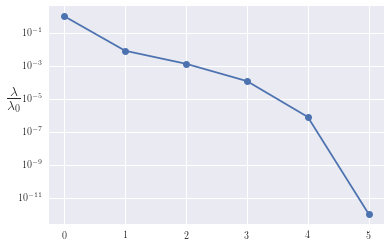

In [6]:
# Plot the eigenvalue spectrum
fig = plt.figure()
ax = fig.add_subplot(111)
plt.semilogy(L[:-1]/L[0],'-o')
ax.set_ylabel(r'$\mathrm{\frac{\lambda}{\lambda_0}}$',rotation=0,fontsize=20);

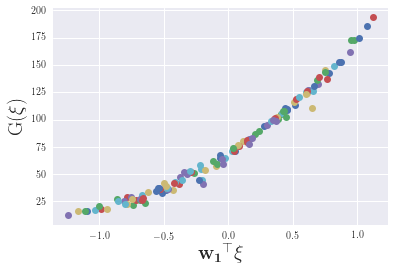

In [7]:
# Plot the SSP
fig = plt.figure()
ax = fig.add_subplot(111)
eta1 = np.zeros((7,1))
eta1[:,0] = V[:,0]
g1 = np.matmul(np.transpose(eta1),np.transpose(xi))
ax.plot(g1,np.transpose(y),'o');
ax.set_xlabel(r'$\mathrm{\mathbf{w_1}^\top\mathbf{\xi}}$',fontsize=20);
ax.set_ylabel(r'$\mathrm{G(\mathbf{\xi})}$',fontsize=20);

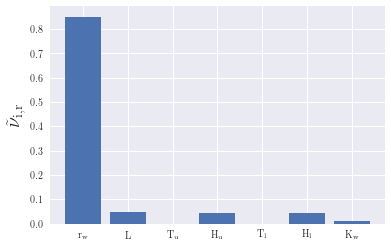

In [8]:
# Compute the activity scores
m = 7
asc = np.zeros((m,1))
for i in range(m):
    for j in range(1):
        asc[i,0] += L[j,0]*V[i,j]**2

asc = asc/np.sum(asc)
fig = plt.figure()
ax = fig.add_subplot(111)
ind = np.arange(1,8)
plt.bar(ind,np.transpose(asc[:,0]));
ax.set_ylabel(r'$\mathrm{\tilde{\nu}_{i,r}}$',fontsize=20)
ax.set_xticks(ind)
ax.set_xticklabels([r'$\mathrm{r_w}$',r'$\mathrm{L}$',r'$\mathrm{T_u}$',r'$\mathrm{H_u}$',r'$\mathrm{T_l}$',r'$\mathrm{H_l}$',r'$\mathrm{K_w}$']);


## 6. Application: Phonon Transport in Si 

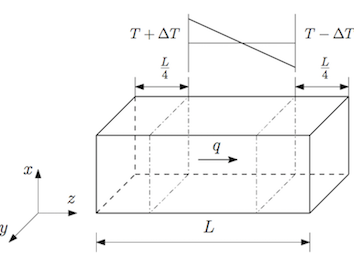

In [9]:
Image(filename='Images/schematic.png')

Stillinger-Weber interatomic potential is used to study phonon transport in Si. 

$$
\begin{equation}
\Phi = \sum\limits_{i,j(i<j)}\phi_2(A,B,p,q,\alpha)\hspace{1mm}+\sum\limits_{i,j,k(i<j<k)}\phi_3(\lambda,\gamma)
\end{equation}
$$

The above potential although widely used has several shortcomings:
 - Accounts only for upto third order atomic interactions
 - Parameters were calibrated using sparse data, limited search, and to ensure stability.
 - Measurement errors and MD noise was not considered in the calibration process.

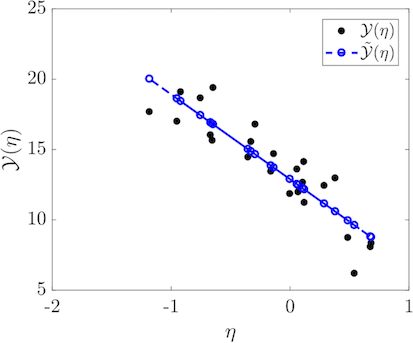

In [10]:
Image(filename='Images/free_ssp1D.png')

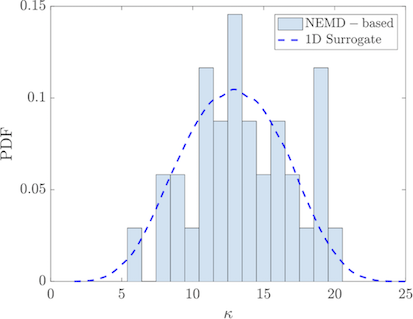

In [11]:
Image(filename='Images/free_pdf_comp_SSP1D.png')

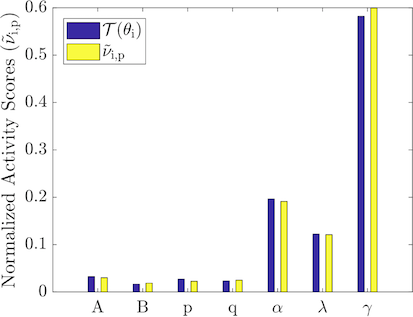

In [12]:
Image(filename='Images/free_as_gsa.png')